# Loading important libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

----

# Loading Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

----

# Data Exploaration

In [3]:
print("We have",df_train.shape[0],"rows and",df_train.shape[1],"columns")
df_train.head()

We have 891 rows and 12 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Some Definitions
1. pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower


2. sibsp: The dataset defines family relations in this way

- Sibling = brother, sister, stepbrother, stepsister

- Spouse = husband, wife (mistresses and fiancés were ignored)


3. parch: The dataset defines family relations in this way

- Parent = mother, father

- Child = daughter, son, stepdaughter, stepson

- Some children travelled only with a nanny, therefore parch=0 for them.


In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


----

# Data Pre-Processing

In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Some observations
- There are a total of 891 passengers in our Training Dataset.
- The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps with the Average.
- The Embarked feature is missing only 2 values so we will drop the rows. 
- The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop this feature.

In [7]:
age_mean = df_train['Age'].mean()
df_train['Age'].replace(np.NaN,age_mean,inplace=True)

In [8]:
df_train.dropna(subset=['Embarked'],axis=0,inplace=True)

In [9]:
df_train.drop(['Cabin'],axis=1,inplace=True)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Now we are having 889 rows instead of 891 and 11 Columns instead of 12 after dropping Cabin feature and the null values.

In [11]:
print("Now, We have",df_train.shape[0],"rows and",df_train.shape[1],"columns")
df_train.head()

Now, We have 889 rows and 11 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


----

# Data Visualization

## Survived

Percentage of people who survived: 38.25 %
Percentage of people who didn't survive: 61.75 %


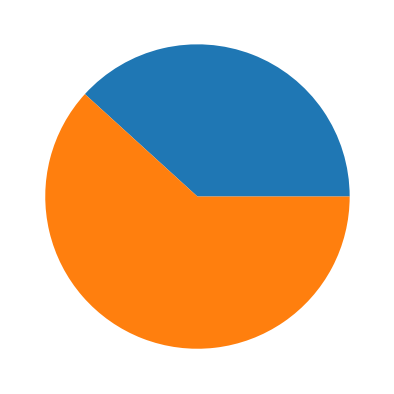

In [51]:
survived_perc = round((df_train[df_train.Survived==1].shape[0]/df_train.shape[0])*100,2)
didntsurvive_perc = round((df_train[df_train.Survived==0].shape[0]/df_train.shape[0])*100,2)

#print percentages of people who Survived and who didn't Survive
print("Percentage of people who survived:",survived_perc,'%')
print("Percentage of people who didn't survive:",didntsurvive_perc,'%')

life = ['Survived',"Didn't Survive"]
data = [survived_perc,didntsurvive_perc]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = life)
COLOR = 'white'
plt.rcParams['text.color'] = COLOR

# show plot
plt.show()

## Sex

Percentage of females who survived: 74.04 %
Percentage of Males who survived: 18.89 %


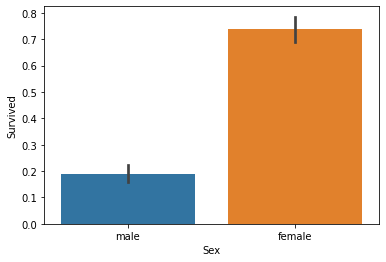

In [13]:
sns.barplot(x='Sex',y='Survived',data=df_train)

#print percentages of females vs. males that survived
print("Percentage of females who survived:", round((df_train[(df_train.Sex=='female') & (df_train.Survived==1)].shape[0]/df_train[df_train.Sex=='female'].shape[0])*100,2),'%')

print("Percentage of Males who survived:", round((df_train[(df_train.Sex=='male') & (df_train.Survived==1)].shape[0]/df_train[df_train.Sex=='male'].shape[0])*100,2),'%')

As we see, the females had a higher survival rate than the males

## Pclass

Percentage of people survived in the first class: 62.62 %
Percentage of people survived in the second class: 47.28 %
Percentage of people survived in the third class: 24.24 %


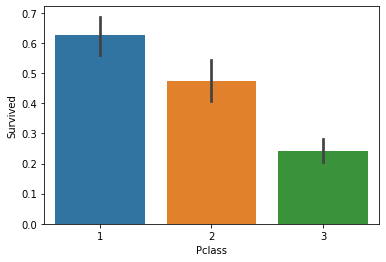

In [14]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

#print percentages of people survived in each social class
print("Percentage of people survived in the first class:", round((df_train[(df_train.Pclass==1) & (df_train.Survived==1)].shape[0]/df_train[df_train.Pclass==1].shape[0])*100,2),'%')

print("Percentage of people survived in the second class:", round((df_train[(df_train.Pclass==2) & (df_train.Survived==1)].shape[0]/df_train[df_train.Pclass==2].shape[0])*100,2),'%')

print("Percentage of people survived in the third class:", round((df_train[(df_train.Pclass==3) & (df_train.Survived==1)].shape[0]/df_train[df_train.Pclass==3].shape[0])*100,2),'%')

Unfortunately, The people from the first and second classes have high survival rate than the people from the third class

## Age

In [15]:
bins=[0, 4, 12, 18,np.inf]
labels=['Baby', 'Child', 'Teenager','Adult']
df_train['AgeGroup'] = pd.cut(df_train["Age"], bins, labels = labels)
df_test['AgeGroup'] = pd.cut(df_test["Age"], bins, labels = labels)

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

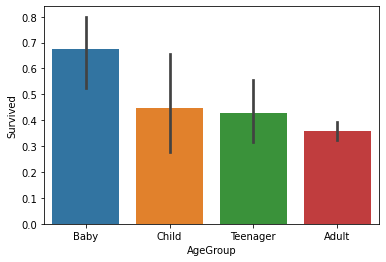

In [16]:
sns.barplot(x='AgeGroup',y='Survived',data=df_train)

As we see, babies have the highest survival rate

## Siblings and Spouses

Percentage of people that came with no sibiling or spouse survived: 34.32 %
Percentage of people that came with one sibiling or spouse survived: 53.59 %
Percentage of people that came with 2 sibiling or spouse survived: 46.43 %


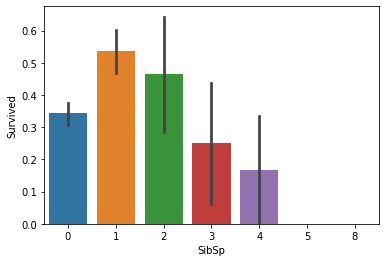

In [17]:
sns.barplot(x='SibSp',y='Survived',data=df_train)

print("Percentage of people that came with no sibiling or spouse survived:", round((df_train[(df_train.SibSp==0) & (df_train.Survived==1)].shape[0]/df_train[df_train.SibSp==0].shape[0])*100,2),'%')

print("Percentage of people that came with one sibiling or spouse survived:", round((df_train[(df_train.SibSp==1) & (df_train.Survived==1)].shape[0]/df_train[df_train.SibSp==1].shape[0])*100,2),'%')

print("Percentage of people that came with 2 sibiling or spouse survived:", round((df_train[(df_train.SibSp==2) & (df_train.Survived==1)].shape[0]/df_train[df_train.SibSp==2].shape[0])*100,2),'%')


## Parch

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

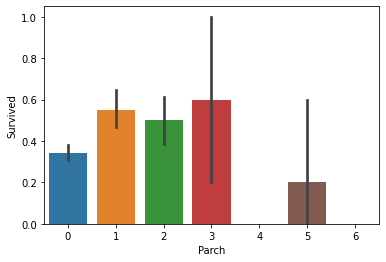

In [18]:
sns.barplot(x='Parch',y='Survived',data=df_train)

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

----

# Data preparation for Modelling

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


In [20]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Adult
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Adult


### Removing Unnecessary features that won't affect our model

In [21]:
df_train.drop(['Name','Ticket','Fare'],axis=1,inplace=True)
df_test.drop(['Name','Ticket','Fare','Cabin'],axis=1,inplace=True)

### Handling missing values in the test dataset

In [22]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
AgeGroup       86
dtype: int64

In [23]:
# Replacing the missing values in the age column with the mean
age_mean_test = df_test['Age'].mean()
df_test['Age'].replace(np.NaN,age_mean_test,inplace=True)

## Encoding categorical values into numerical values

In [24]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Adult': 4}
df_train['AgeGroup'] = df_train['AgeGroup'].map(age_mapping)
df_test['AgeGroup'] = df_test['AgeGroup'].map(age_mapping)

#dropping the Age feature for now, might change
df_train.drop(['Age'], axis = 1,inplace=True)
df_test.drop(['Age'], axis = 1,inplace=True)

In [25]:
#map each Sex value to a numerical value
sex_mapping = {'male': 0, 'female': 1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

In [26]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)

df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,0,1,0,1,4
1,2,1,1,1,1,0,2,4
2,3,1,3,1,0,0,1,4
3,4,1,1,1,1,0,1,4
4,5,0,3,0,0,0,1,4


## Now our dataset is Ready

----

# Modelling

In [27]:
predictors = df_train.drop(['Survived', 'PassengerId'], axis=1)
target = df_train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

In [28]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

74.16


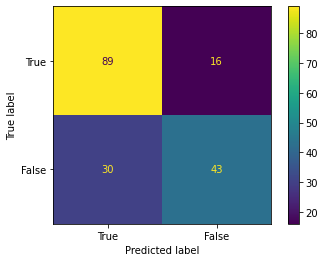

In [31]:
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [37]:
print(metrics.precision_score(y_val,y_pred))
print(metrics.recall_score(y_val,y_pred))
print(metrics.f1_score(y_val,y_pred))

0.7288135593220338
0.589041095890411
0.6515151515151515


## Using our Model on the Test Set

In [43]:
#set ids as PassengerId and predict survival 
ids = df_test['PassengerId']
predictions = logreg.predict(df_test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

In [44]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1
